In [2]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv('alzheimers_modified_data (1).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PatientID                  2149 non-null   object
 1   Age                        2149 non-null   object
 2   Gender                     2149 non-null   object
 3   Ethnicity                  2149 non-null   int64 
 4   EducationLevel             2149 non-null   object
 5   BMI                        2149 non-null   object
 6   Smoking                    2149 non-null   object
 7   AlcoholConsumption         2149 non-null   object
 8   PhysicalActivity           2149 non-null   object
 9   DietQuality                2149 non-null   object
 10  SleepQuality               2149 non-null   object
 11  FamilyHistoryAlzheimers    2149 non-null   object
 12  CardiovascularDisease      2149 non-null   object
 13  Diabetes                   2149 non-null   object
 14  Depressi

In [4]:
df.drop('PatientID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2149 non-null   object
 1   Gender                     2149 non-null   object
 2   Ethnicity                  2149 non-null   int64 
 3   EducationLevel             2149 non-null   object
 4   BMI                        2149 non-null   object
 5   Smoking                    2149 non-null   object
 6   AlcoholConsumption         2149 non-null   object
 7   PhysicalActivity           2149 non-null   object
 8   DietQuality                2149 non-null   object
 9   SleepQuality               2149 non-null   object
 10  FamilyHistoryAlzheimers    2149 non-null   object
 11  CardiovascularDisease      2149 non-null   object
 12  Diabetes                   2149 non-null   object
 13  Depression                 2149 non-null   object
 14  HeadInju

In [5]:
df['Age'].unique()

array(['73', '89', '74', '86', '68', '75', '72', '87', '78', '84', '64',
       '69', '63', '65', '82', '77', '  72   ', '71', '83', '79', '67',
       '66', '70', '85', '60', '88', '62', '  69   ', '81', '61', '80',
       '90', '76', '   71  ', '  83   ', '  70   ', '  76   ', '  60   ',
       '   84  ', '   75  ', '  89   ', '   72  ', '  88   ', '  71   ',
       '  80   ', '  82   ', '  64   ', '  67   ', '   70  ', '  90   ',
       '   85  ', '   67  ', '  61   ', '  73   ', '   76  ', '   83  ',
       '   78  ', '   69  ', '   87  ', '  68   ', '   81  ', '   60  ',
       '  62   ', '   MISSING  ', '  75   ', '  74   ', '   89  ',
       '   79  ', '   74  ', '  85   ', '   77  ', '   90  ', '  77   ',
       '   73  ', '  78   ', '  81   ', '  84   ', '  66   ', '   61  ',
       '  87   ', '   80  ', '  missing   ', '   68  ', '   88  ',
       '   65  '], dtype=object)

In [7]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [8]:
numerical_colms = ['Age','Gender', 'BMI','EducationLevel',
                   'Smoking','AlcoholConsumption','PhysicalActivity',
                   'DietQuality','SleepQuality','FamilyHistoryAlzheimers',
                   'CardiovascularDisease','Diabetes','Depression', 'HeadInjury','Hypertension','SystolicBP','DiastolicBP','CholesterolTotal',
                   'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems',
                   'ADL','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','DoctorInCharge']

for col in numerical_colms:
      df[col] = df[col].astype(str)
    # Remove leading/trailing spaces
      df[col] = df[col].str.strip()
    # Replace specific values with NaN
      df[col] = df[col].replace(['MISSING', 'missing'], np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2147 non-null   object
 1   Gender                     2148 non-null   object
 2   Ethnicity                  2149 non-null   int64 
 3   EducationLevel             2147 non-null   object
 4   BMI                        2143 non-null   object
 5   Smoking                    2145 non-null   object
 6   AlcoholConsumption         2148 non-null   object
 7   PhysicalActivity           2146 non-null   object
 8   DietQuality                2145 non-null   object
 9   SleepQuality               2145 non-null   object
 10  FamilyHistoryAlzheimers    2146 non-null   object
 11  CardiovascularDisease      2146 non-null   object
 12  Diabetes                   2144 non-null   object
 13  Depression                 2147 non-null   object
 14  HeadInju

In [10]:
numerical_colms = ['Age','Gender', 'BMI','EducationLevel',
                   'Smoking','AlcoholConsumption','PhysicalActivity',
                   'DietQuality','SleepQuality','FamilyHistoryAlzheimers',
                   'CardiovascularDisease','Diabetes','Depression', 'HeadInjury','Hypertension','SystolicBP','DiastolicBP','CholesterolTotal',
                   'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems',
                   'ADL','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','DoctorInCharge']

for col in numerical_colms:
      print(df[col].sort_values())
      print("\n")

1074     60
342      60
1575     60
1515     60
447      60
       ... 
1164     90
730      90
1690     90
933     NaN
1718    NaN
Name: Age, Length: 2149, dtype: object


0         0
1202      0
1201      0
1199      0
1197      0
       ... 
1269      1
1268      1
1278      1
1073      1
1643    NaN
Name: Gender, Length: 2149, dtype: object


928      15.00885118163106
1578    15.012070695981445
749     15.014659194933325
1624    15.018239929530528
184     15.031271340942569
               ...        
653                    NaN
1092                   NaN
1288                   NaN
1857                   NaN
2044                   NaN
Name: BMI, Length: 2149, dtype: object


741       0
1118      0
1117      0
1644      0
1646      0
       ... 
1799      3
550       3
1075      3
566     NaN
700     NaN
Name: EducationLevel, Length: 2149, dtype: object


0         0
1320      0
1319      0
1318      0
1317      0
       ... 
446       1
636     NaN
814     NaN
1002    NaN
1917    N

In [11]:
df.isnull().sum()

Age                          2
Gender                       1
Ethnicity                    0
EducationLevel               2
BMI                          6
Smoking                      4
AlcoholConsumption           1
PhysicalActivity             3
DietQuality                  4
SleepQuality                 4
FamilyHistoryAlzheimers      3
CardiovascularDisease        3
Diabetes                     5
Depression                   2
HeadInjury                   3
Hypertension                 1
SystolicBP                   4
DiastolicBP                  3
CholesterolTotal             4
CholesterolLDL               2
CholesterolHDL               6
CholesterolTriglycerides     1
MMSE                         3
FunctionalAssessment         3
MemoryComplaints             3
BehavioralProblems           6
ADL                          4
Confusion                    5
Disorientation               2
PersonalityChanges           4
DifficultyCompletingTasks    8
Forgetfulness                1
Diagnosi

In [12]:
numerical_colms = ['Age','Gender', 'BMI','EducationLevel',
                   'Smoking','AlcoholConsumption','PhysicalActivity',
                   'DietQuality','SleepQuality','FamilyHistoryAlzheimers',
                   'CardiovascularDisease','Diabetes','Depression', 'HeadInjury','Hypertension','SystolicBP','DiastolicBP','CholesterolTotal',
                   'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems',
                   'ADL','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness']

for col in numerical_colms:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2147 non-null   float64
 1   Gender                     2148 non-null   float64
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2147 non-null   float64
 4   BMI                        2143 non-null   float64
 5   Smoking                    2145 non-null   float64
 6   AlcoholConsumption         2148 non-null   float64
 7   PhysicalActivity           2146 non-null   float64
 8   DietQuality                2145 non-null   float64
 9   SleepQuality               2145 non-null   float64
 10  FamilyHistoryAlzheimers    2146 non-null   float64
 11  CardiovascularDisease      2146 non-null   float64
 12  Diabetes                   2144 non-null   float64
 13  Depression                 2147 non-null   float

In [15]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2147.000000,2148.000000,2149.000000,2147.000000,2143.000000,2145.000000,2148.000000,2146.000000,2145.000000,2145.000000,...,2146.000000,2146.000000,2143.000000,2145.000000,2144.000000,2147.000000,2145.000000,2141.000000,2148.000000,2149.000000
mean,74.918957,0.506518,0.697534,1.286446,27.657759,0.288112,10.042851,4.919709,4.993433,7.048112,...,5.081017,0.208295,0.157256,4.987927,0.205690,0.158361,0.151049,0.158337,0.301676,0.353653
std,8.988185,0.500074,0.996128,0.903765,7.221315,0.452989,5.757081,2.857636,2.909332,1.763689,...,2.893638,0.406183,0.364127,2.949084,0.404299,0.365164,0.358180,0.365142,0.459092,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.613604,0.000000,5.151910,2.558216,2.458455,5.479943,...,2.566632,0.000000,0.000000,2.352504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.935033,4.769812,5.076087,7.112846,...,5.093442,0.000000,0.000000,5.041728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.873210,1.000000,15.160224,7.423688,7.558625,8.561219,...,7.552489,0.000000,0.000000,7.583542,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2144    False
2145    False
2146    False
2147    False
2148    False
Length: 2149, dtype: bool


In [20]:

df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   float64
 1   Gender                     2148 non-null   float64
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2147 non-null   float64
 4   BMI                        2143 non-null   float64
 5   Smoking                    2145 non-null   float64
 6   AlcoholConsumption         2148 non-null   float64
 7   PhysicalActivity           2146 non-null   float64
 8   DietQuality                2145 non-null   float64
 9   SleepQuality               2145 non-null   float64
 10  FamilyHistoryAlzheimers    2146 non-null   float64
 11  CardiovascularDisease      2146 non-null   float64
 12  Diabetes                   2144 non-null   float64
 13  Depression                 2147 non-null   float

In [16]:
df['Age'].sort_values()

1074    60.0
342     60.0
1575    60.0
1515    60.0
447     60.0
        ... 
1164    90.0
730     90.0
1690    90.0
933      NaN
1718     NaN
Name: Age, Length: 2149, dtype: float64

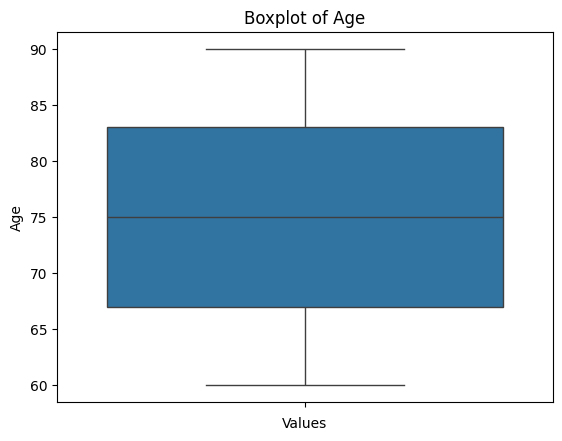

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Age')
plt.xlabel('Values')
plt.show()

In [18]:
df['Age'].fillna(round(df['Age'].mean()), inplace=True)
df['Age'].isnull().sum()

0

C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\1294785425.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Blues')


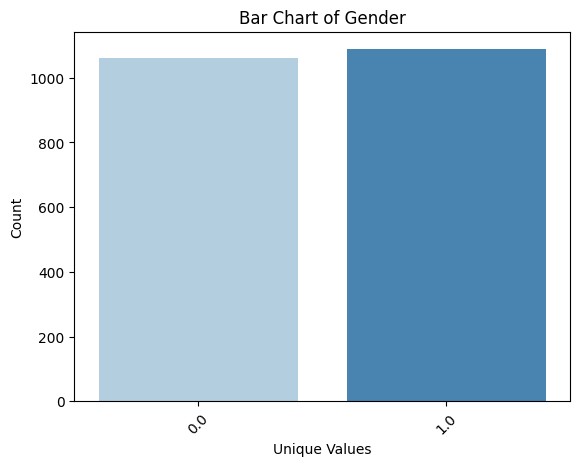

In [21]:
sns.countplot(x='Gender', data=df, palette='Blues')

plt.title('Bar Chart of Gender')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [22]:
class1 = df[df['Diagnosis'] == 1]['Gender'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Gender'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Gender"])==True:
        df.loc[x,"Gender"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Gender"])==True:
         df.loc[x,"Gender"]=class0
df['Gender'].isnull().sum()

0

In [24]:
class1 = df[df['Diagnosis'] == 1]['Ethnicity'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Ethnicity'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Ethnicity"])==True:
        df.loc[x,"Ethnicity"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Ethnicity"])==True:
         df.loc[x,"Ethnicity"]=class0

In [25]:
class1 = df[df['Diagnosis'] == 1]['EducationLevel'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['EducationLevel'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"EducationLevel"])==True:
        df.loc[x,"EducationLevel"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"EducationLevel"])==True:
         df.loc[x,"EducationLevel"]=class0

In [26]:
class1 = df[df['Diagnosis'] == 1]['Smoking'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Smoking'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Smoking"])==True:
        df.loc[x,"Smoking"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Smoking"])==True:
         df.loc[x,"Smoking"]=class0

In [27]:
class1 = df[df['Diagnosis'] == 1]['FamilyHistoryAlzheimers'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['FamilyHistoryAlzheimers'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"FamilyHistoryAlzheimers"])==True:
        df.loc[x,"FamilyHistoryAlzheimers"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"FamilyHistoryAlzheimers"])==True:
         df.loc[x,"FamilyHistoryAlzheimers"]=class0

In [28]:
class1 = df[df['Diagnosis'] == 1]['CardiovascularDisease'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['CardiovascularDisease'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CardiovascularDisease"])==True:
        df.loc[x,"CardiovascularDisease"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CardiovascularDisease"])==True:
         df.loc[x,"CardiovascularDisease"]=class0

In [29]:
class1 = df[df['Diagnosis'] == 1]['Diabetes'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Diabetes'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Diabetes"])==True:
        df.loc[x,"Diabetes"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Diabetes"])==True:
         df.loc[x,"Diabetes"]=class0

In [30]:
class1 = df[df['Diagnosis'] == 1]['Depression'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Depression'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Depression"])==True:
        df.loc[x,"Depression"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Depression"])==True:
         df.loc[x,"Depression"]=class0

In [31]:
class1 = df[df['Diagnosis'] == 1]['HeadInjury'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['HeadInjury'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"HeadInjury"])==True:
        df.loc[x,"HeadInjury"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"HeadInjury"])==True:
         df.loc[x,"HeadInjury"]=class0

In [32]:
class1 = df[df['Diagnosis'] == 1]['Hypertension'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Hypertension'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Hypertension"])==True:
        df.loc[x,"Hypertension"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Hypertension"])==True:
         df.loc[x,"Depression"]=class0

In [33]:
class1 = df[df['Diagnosis'] == 1]['Hypertension'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Hypertension'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Hypertension"])==True:
        df.loc[x,"Hypertension"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Hypertension"])==True:
         df.loc[x,"Hypertension"]=class0

In [34]:
class1 = df[df['Diagnosis'] == 1]['MemoryComplaints'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['MemoryComplaints'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"MemoryComplaints"])==True:
        df.loc[x,"MemoryComplaints"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"MemoryComplaints"])==True:
         df.loc[x,"MemoryComplaints"]=class0

In [35]:
class1 = df[df['Diagnosis'] == 1]['BehavioralProblems'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['BehavioralProblems'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"BehavioralProblems"])==True:
        df.loc[x,"BehavioralProblems"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"BehavioralProblems"])==True:
         df.loc[x,"BehavioralProblems"]=class0

In [36]:
class1 = df[df['Diagnosis'] == 1]['Confusion'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Confusion'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Confusion"])==True:
        df.loc[x,"Confusion"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Confusion"])==True:
         df.loc[x,"Confusion"]=class0

In [37]:
class1 = df[df['Diagnosis'] == 1]['Disorientation'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Disorientation'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Disorientation"])==True:
        df.loc[x,"Disorientation"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Disorientation"])==True:
         df.loc[x,"Disorientation"]=class0

In [38]:
class1 = df[df['Diagnosis'] == 1]['PersonalityChanges'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['PersonalityChanges'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"PersonalityChanges"])==True:
        df.loc[x,"PersonalityChanges"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"PersonalityChanges"])==True:
         df.loc[x,"PersonalityChanges"]=class0

In [39]:
class1 = df[df['Diagnosis'] == 1]['DifficultyCompletingTasks'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['DifficultyCompletingTasks'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"DifficultyCompletingTasks"])==True:
        df.loc[x,"DifficultyCompletingTasks"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"DifficultyCompletingTasks"])==True:
         df.loc[x,"DifficultyCompletingTasks"]=class0

In [40]:
class1 = df[df['Diagnosis'] == 1]['Forgetfulness'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Forgetfulness'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Forgetfulness"])==True:
        df.loc[x,"Forgetfulness"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Forgetfulness"])==True:
         df.loc[x,"Forgetfulness"]=class0

In [41]:
class1 = df[df['Diagnosis'] == 1]['BMI'].mean()
class0 = df[df['Diagnosis'] == 0]['BMI'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"BMI"])==True:
        df.loc[x,"BMI"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"BMI"])==True:
         df.loc[x,"BMI"]=class0

In [42]:
class1 = df[df['Diagnosis'] == 1]['AlcoholConsumption'].mean()
class0 = df[df['Diagnosis'] == 0]['AlcoholConsumption'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"AlcoholConsumption"])==True:
        df.loc[x,"AlcoholConsumption"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"AlcoholConsumption"])==True:
         df.loc[x,"AlcoholConsumption"]=class0

In [43]:
class1 = df[df['Diagnosis'] == 1]['PhysicalActivity'].mean()
class0 = df[df['Diagnosis'] == 0]['PhysicalActivity'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"PhysicalActivity"])==True:
        df.loc[x,"PhysicalActivity"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"PhysicalActivity"])==True:
         df.loc[x,"PhysicalActivity"]=class0

In [44]:
class1 = df[df['Diagnosis'] == 1]['DietQuality'].mean()
class0 = df[df['Diagnosis'] == 0]['DietQuality'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"DietQuality"])==True:
        df.loc[x,"DietQuality"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"DietQuality"])==True:
         df.loc[x,"DietQuality"]=class0

In [45]:
class1 = df[df['Diagnosis'] == 1]['SleepQuality'].mean()
class0 = df[df['Diagnosis'] == 0]['SleepQuality'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"SleepQuality"])==True:
        df.loc[x,"SleepQuality"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"SleepQuality"])==True:
         df.loc[x,"SleepQuality"]=class0

In [46]:
class1 = df[df['Diagnosis'] == 1]['SystolicBP'].mean()
class0 = df[df['Diagnosis'] == 0]['SystolicBP'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"SystolicBP"])==True:
        df.loc[x,"SystolicBP"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"SystolicBP"])==True:
         df.loc[x,"SystolicBP"]=class0

In [47]:
class1 = df[df['Diagnosis'] == 1]['DiastolicBP'].mean()
class0 = df[df['Diagnosis'] == 0]['DiastolicBP'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"DiastolicBP"])==True:
        df.loc[x,"DiastolicBP"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"DiastolicBP"])==True:
         df.loc[x,"DiastolicBP"]=class0

In [48]:
class1 = df[df['Diagnosis'] == 1]['CholesterolTotal'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolTotal'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolTotal"])==True:
        df.loc[x,"CholesterolTotal"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolTotal"])==True:
         df.loc[x,"CholesterolTotal"]=class0

In [49]:
class1 = df[df['Diagnosis'] == 1]['CholesterolLDL'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolLDL'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolLDL"])==True:
        df.loc[x,"CholesterolLDL"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolLDL"])==True:
         df.loc[x,"CholesterolLDL"]=class0

In [50]:
class1 = df[df['Diagnosis'] == 1]['CholesterolHDL'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolHDL'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolHDL"])==True:
        df.loc[x,"CholesterolHDL"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolHDL"])==True:
         df.loc[x,"CholesterolHDL"]=class0

In [51]:
class1 = df[df['Diagnosis'] == 1]['CholesterolTriglycerides'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolTriglycerides'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolTriglycerides"])==True:
        df.loc[x,"CholesterolTriglycerides"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolTriglycerides"])==True:
         df.loc[x,"CholesterolTriglycerides"]=class0

In [52]:
class1 = df[df['Diagnosis'] == 1]['MMSE'].mean()
class0 = df[df['Diagnosis'] == 0]['MMSE'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"MMSE"])==True:
        df.loc[x,"MMSE"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"MMSE"])==True:
         df.loc[x,"MMSE"]=class0

In [53]:
class1 = df[df['Diagnosis'] == 1]['FunctionalAssessment'].mean()
class0 = df[df['Diagnosis'] == 0]['FunctionalAssessment'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"FunctionalAssessment"])==True:
        df.loc[x,"FunctionalAssessment"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"FunctionalAssessment"])==True:
         df.loc[x,"FunctionalAssessment"]=class0

In [54]:
class1 = df[df['Diagnosis'] == 1]['ADL'].mean()
class0 = df[df['Diagnosis'] == 0]['ADL'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"ADL"])==True:
        df.loc[x,"ADL"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"ADL"])==True:
         df.loc[x,"ADL"]=class0

In [55]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [56]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

Age : 31
Gender : 2
Ethnicity : 4
EducationLevel : 4
BMI : 2145
Smoking : 2
AlcoholConsumption : 2149
PhysicalActivity : 2148
DietQuality : 2146
SleepQuality : 2147
FamilyHistoryAlzheimers : 2
CardiovascularDisease : 2
Diabetes : 2
Depression : 2
HeadInjury : 2
Hypertension : 2
SystolicBP : 92
DiastolicBP : 62
CholesterolTotal : 2147
CholesterolLDL : 2149
CholesterolHDL : 2145
CholesterolTriglycerides : 2149
MMSE : 2148
FunctionalAssessment : 2147
MemoryComplaints : 2
BehavioralProblems : 2
ADL : 2147
Confusion : 2
Disorientation : 2
PersonalityChanges : 2
DifficultyCompletingTasks : 2
Forgetfulness : 2
Diagnosis : 2
DoctorInCharge : 3


In [57]:
df.drop(['CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','DietQuality','BMI','AlcoholConsumption','DoctorInCharge'], axis="columns", inplace=True)

In [58]:
noncat=[]
cate =[]
for col in df.columns:
    if df[col].nunique()>4:
        noncat.append(col)
    else:
        cate.append(col)
print(noncat)
print(cate)

['Age', 'PhysicalActivity', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'MMSE', 'FunctionalAssessment', 'ADL']
['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


In [59]:
target1 = df[df.Diagnosis==1]
target1["Gender"].value_counts()



0.0    386
1.0    374
Name: Gender, dtype: int64

In [60]:
target1 = df[df.Diagnosis==1]
target1["EducationLevel"].value_counts()

1.0    303
2.0    217
0.0    174
3.0     66
Name: EducationLevel, dtype: int64

In [61]:
target1 = df[df.Diagnosis==1]
target1["Diabetes"].value_counts()

0.0    657
1.0    103
Name: Diabetes, dtype: int64

In [62]:
df.groupby(['Diabetes','MemoryComplaints'])['Diagnosis'].value_counts()

Diabetes  MemoryComplaints  Diagnosis
0.0       0.0               0            1028
                            1             413
          1.0               1             244
                            0             141
1.0       0.0               0             200
                            1              61
          1.0               1              42
                            0              20
Name: Diagnosis, dtype: int64

In [63]:
df.groupby(['Depression','DifficultyCompletingTasks'])['Diagnosis'].value_counts()

Depression  DifficultyCompletingTasks  Diagnosis
0.0         0.0                        0            928
                                       1            514
            1.0                        0            181
                                       1             96
1.0         0.0                        0            244
                                       1            124
            1.0                        0             36
                                       1             26
Name: Diagnosis, dtype: int64

In [64]:
df.groupby(['Gender','Smoking'])['Diagnosis'].value_counts()

Gender  Smoking  Diagnosis
0.0     0.0      0            483
                 1            280
        1.0      0            191
                 1            106
1.0     0.0      0            504
                 1            264
        1.0      0            211
                 1            110
Name: Diagnosis, dtype: int64

In [65]:
df.groupby(['Diabetes','Depression'])['Diagnosis'].value_counts()

Diabetes  Depression  Diagnosis
0.0       0.0         0            926
                      1            536
          1.0         0            243
                      1            121
1.0       0.0         0            183
                      1             74
          1.0         0             37
                      1             29
Name: Diagnosis, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

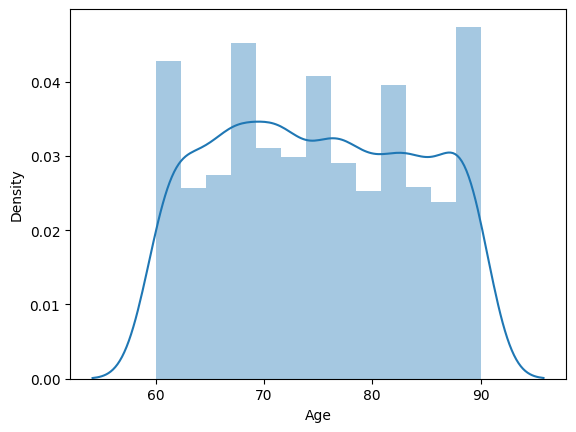

In [66]:
sns.distplot(df['Age'])

<Axes: xlabel='PhysicalActivity', ylabel='Density'>

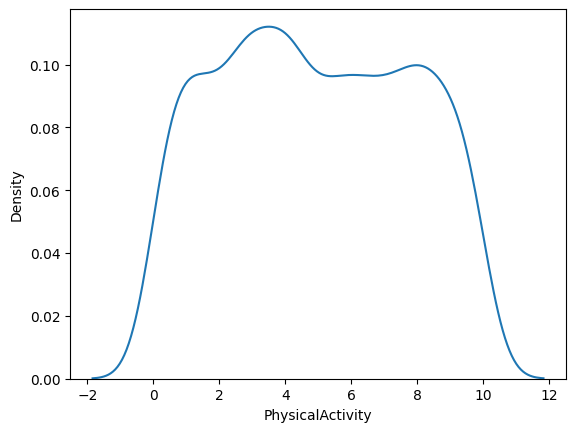

In [67]:
sns.kdeplot(df["PhysicalActivity"])

<Axes: xlabel='Gender', ylabel='count'>

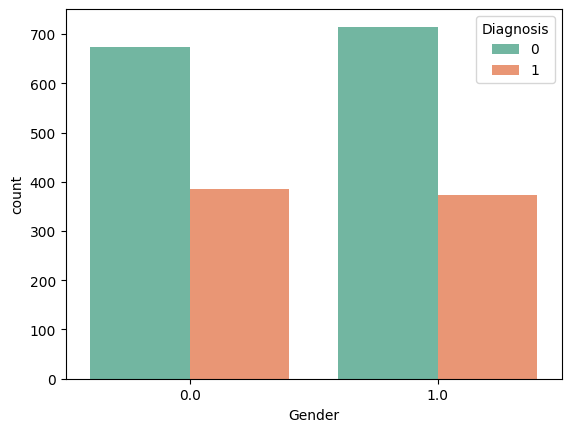

In [68]:
sns.countplot(data=df,x='Gender',hue='Diagnosis',palette='Set2')

<Axes: xlabel='Diabetes', ylabel='count'>

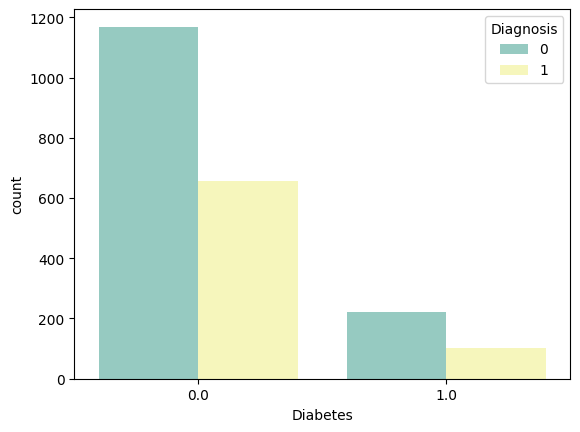

In [69]:
sns.countplot(data=df,x='Diabetes',hue='Diagnosis',palette='Set3')

<Axes: xlabel='Smoking', ylabel='count'>

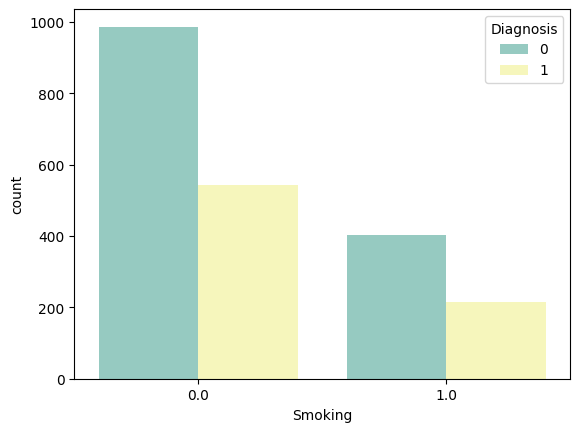

In [70]:
sns.countplot(data=df,x='Smoking',hue='Diagnosis',palette='Set3')

<Axes: xlabel='EducationLevel', ylabel='count'>

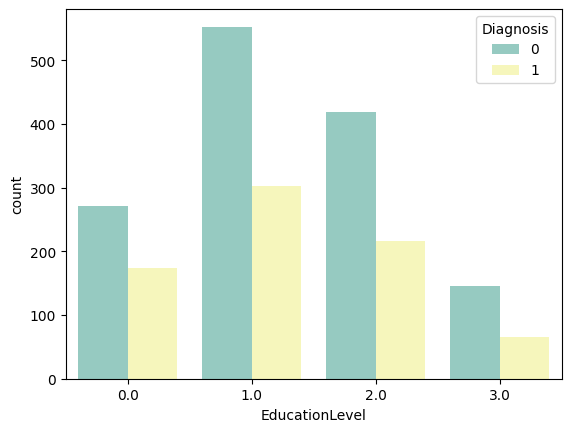

In [71]:
sns.countplot(data=df,x='EducationLevel',hue='Diagnosis',palette='Set3')

<Axes: >

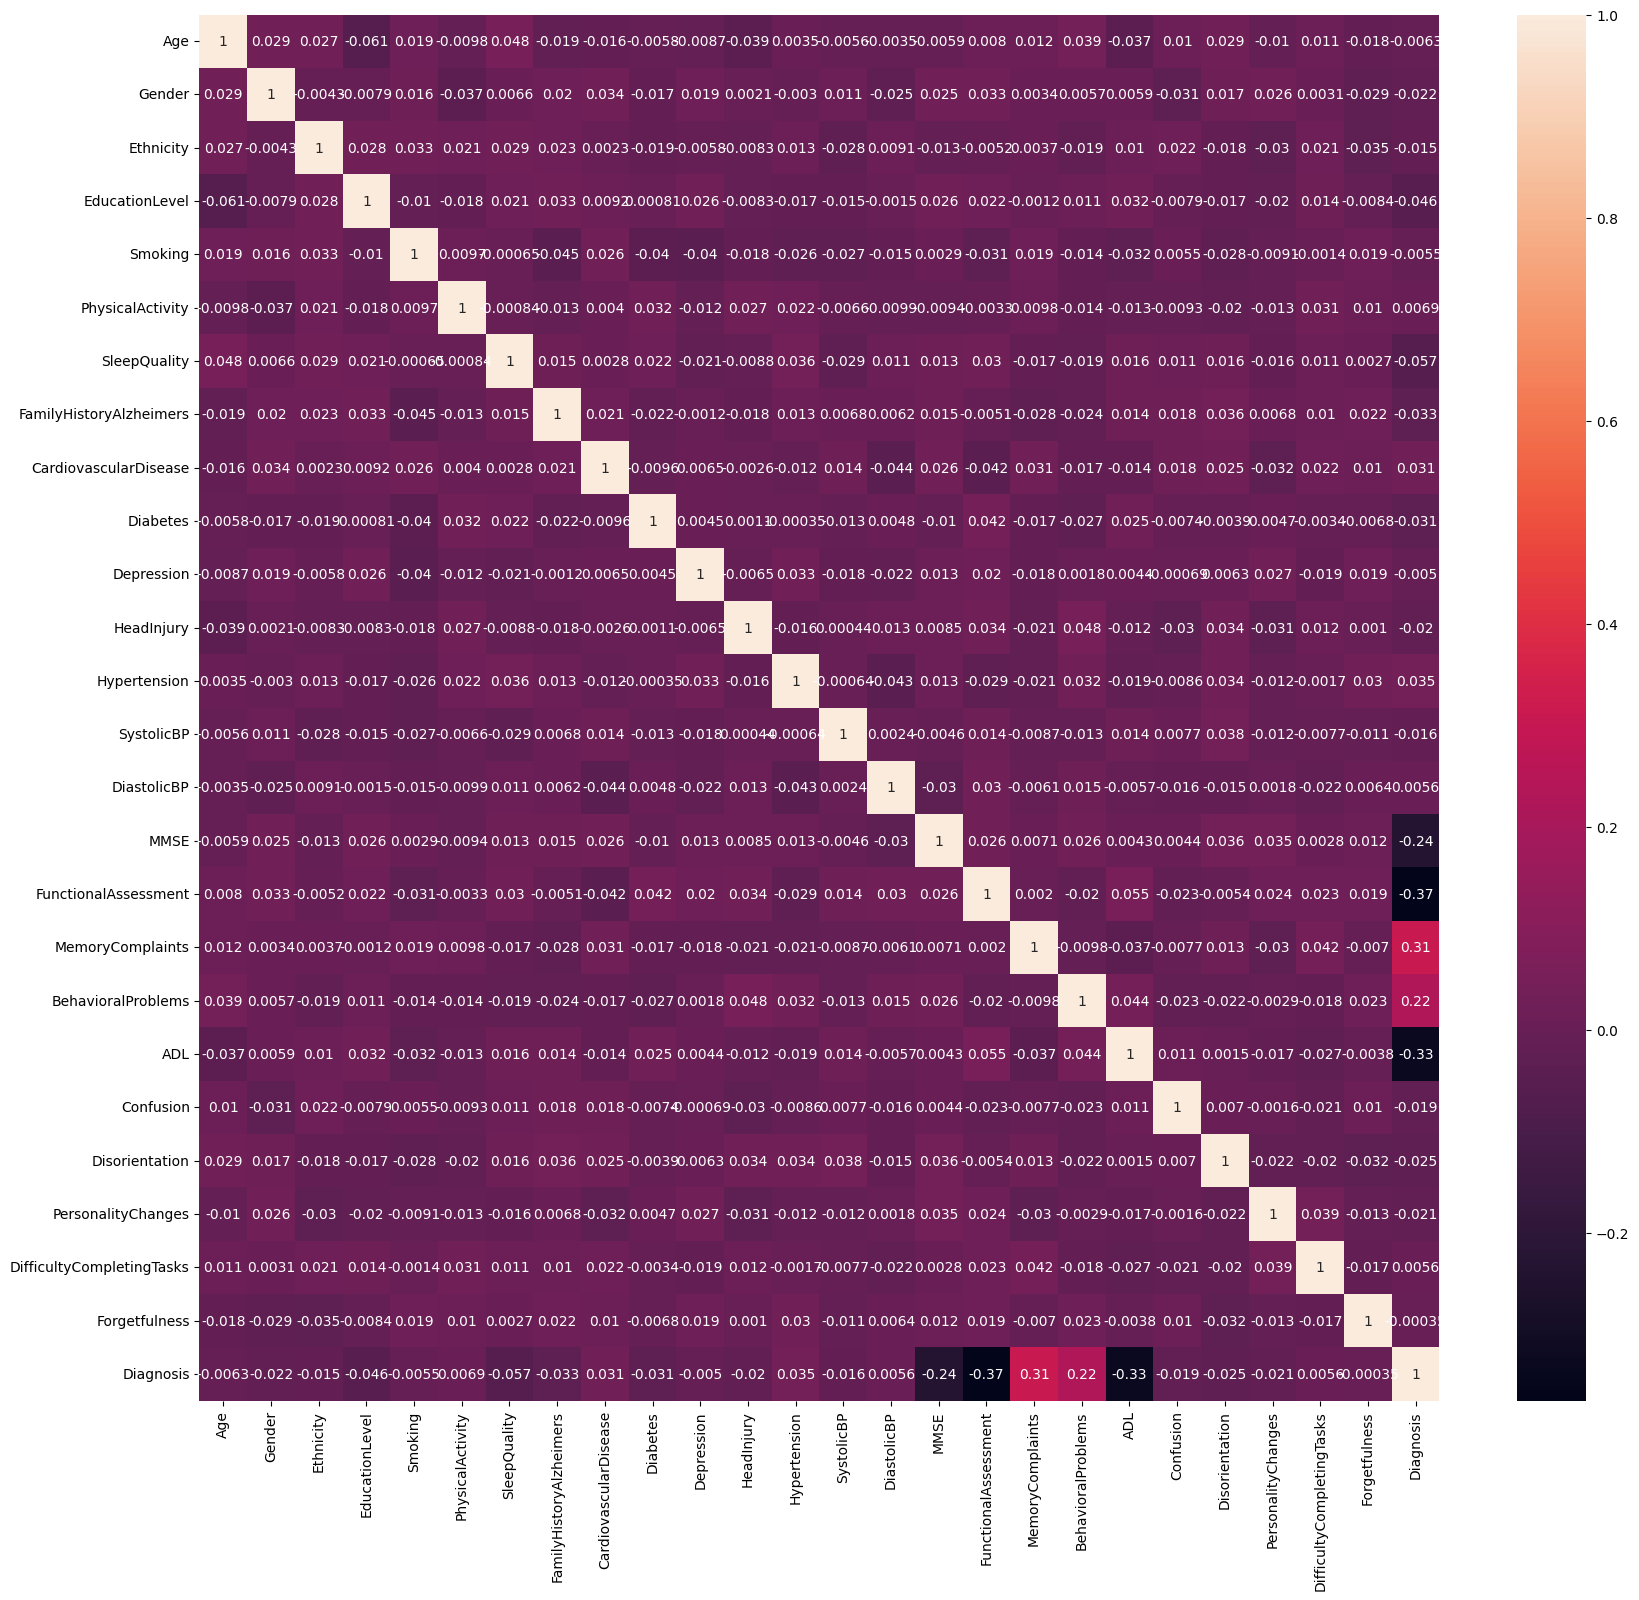

In [72]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Ethnicity', ylabel='count'>

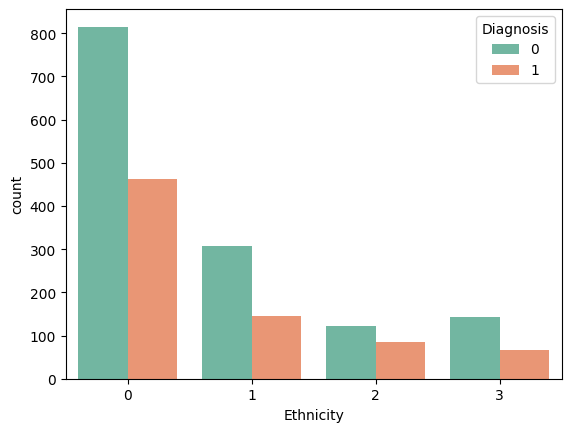

In [73]:
sns.countplot(data=df,x='Ethnicity',hue='Diagnosis',palette='Set2')

C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\3970644434.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\3970644434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='coolwarm')


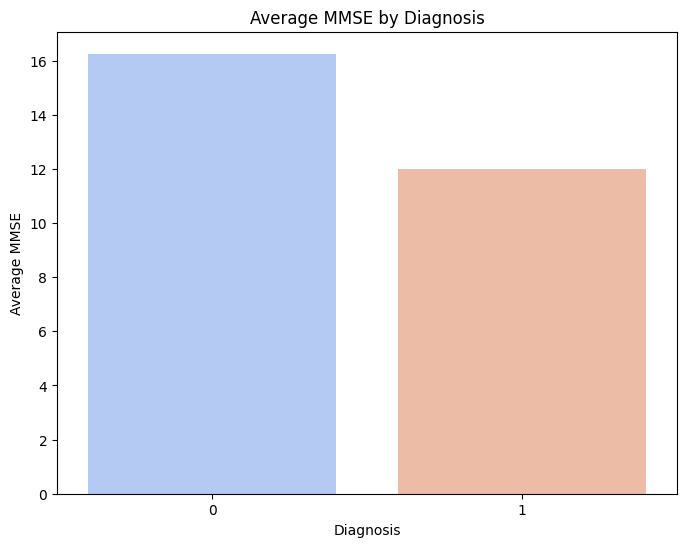

C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\3970644434.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\3970644434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='coolwarm')


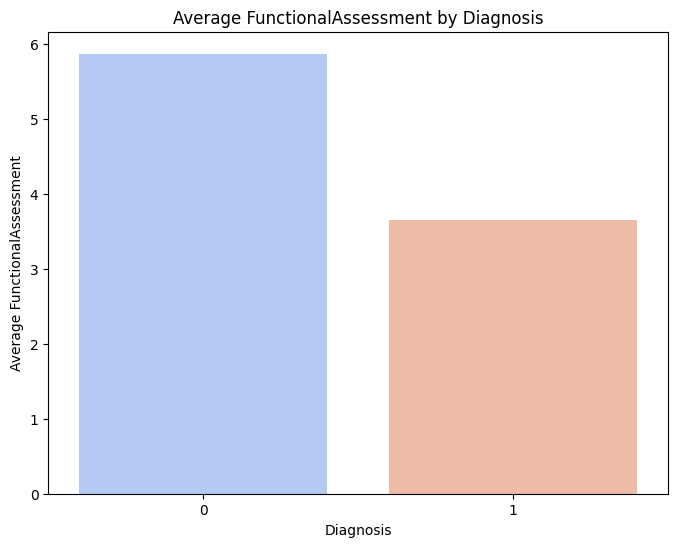

C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\3970644434.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\3970644434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='coolwarm')


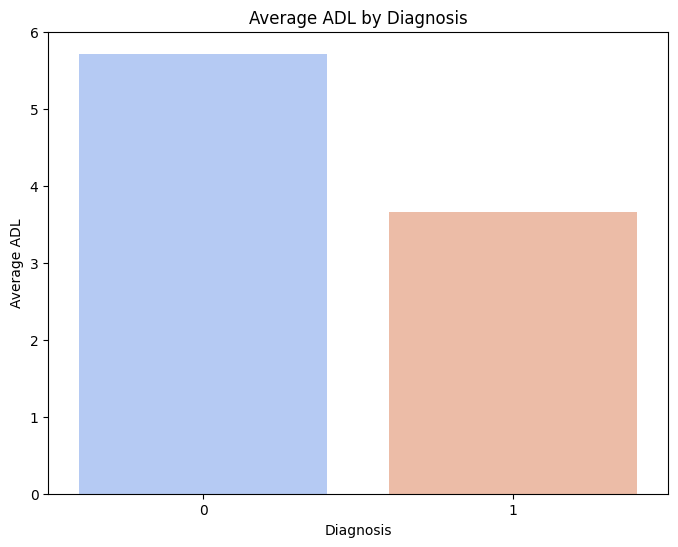

In [75]:
continuous_cols = ['MMSE', 'FunctionalAssessment', 'ADL']

# Loop through continuous columns and create a bar chart for each
for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Diagnosis', y=col, data=df, estimator='mean', ci=None, palette='coolwarm')
    plt.title(f'Average {col} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(f'Average {col}')
    plt.show()

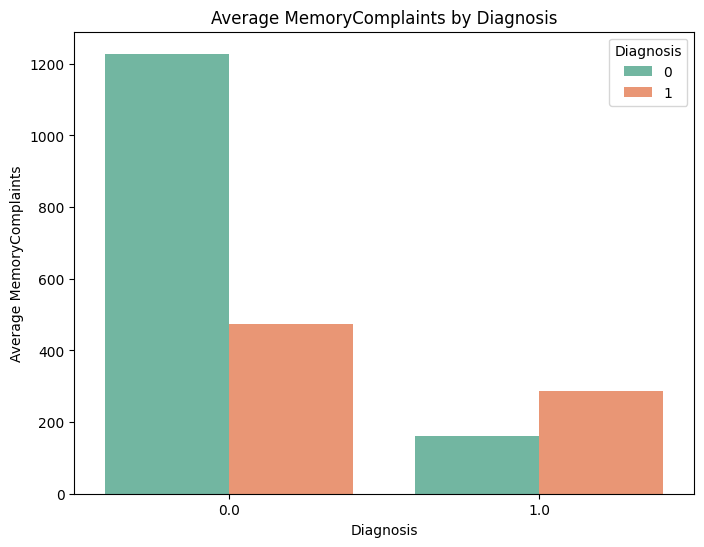

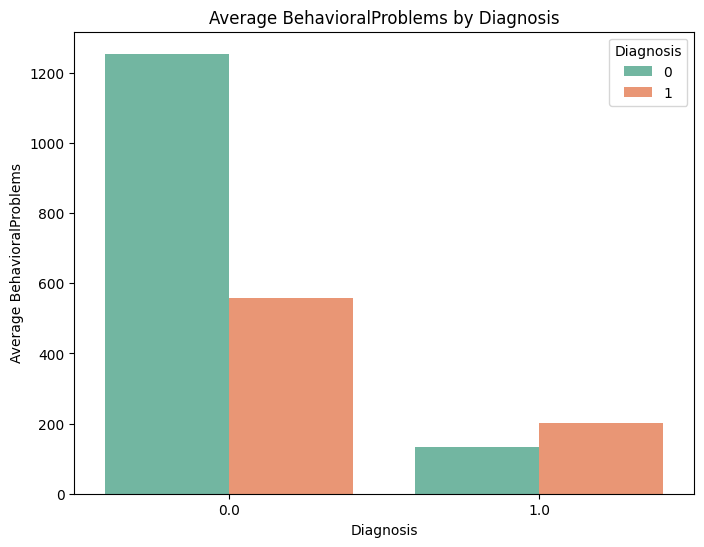

In [76]:
continuous_cols = ['MemoryComplaints', 'BehavioralProblems']

# Loop through continuous columns and create a bar chart for each
for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df,x=col,hue='Diagnosis',palette='Set2')
    plt.title(f'Average {col} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(f'Average {col}')
    plt.show()

<Axes: xlabel='Age', ylabel='Count'>

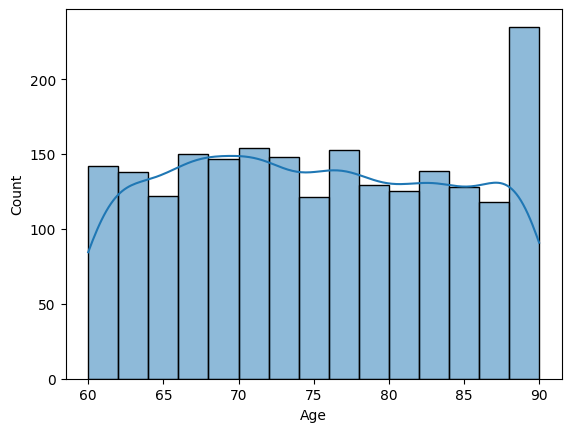

In [77]:
sns.histplot(data=df, x='Age', kde=True, bins=15)

In [78]:
df['Age'].value_counts()

88.0    84
68.0    84
72.0    82
76.0    81
71.0    80
90.0    79
67.0    77
60.0    74
70.0    74
66.0    73
89.0    72
77.0    72
78.0    72
84.0    71
83.0    71
62.0    70
63.0    68
80.0    68
61.0    68
87.0    68
82.0    68
75.0    66
73.0    66
65.0    63
69.0    63
64.0    59
79.0    57
85.0    57
81.0    57
74.0    55
86.0    50
Name: Age, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_22960\4158889744.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='Age', data=df, palette='viridis')


<Axes: xlabel='Diagnosis', ylabel='Age'>

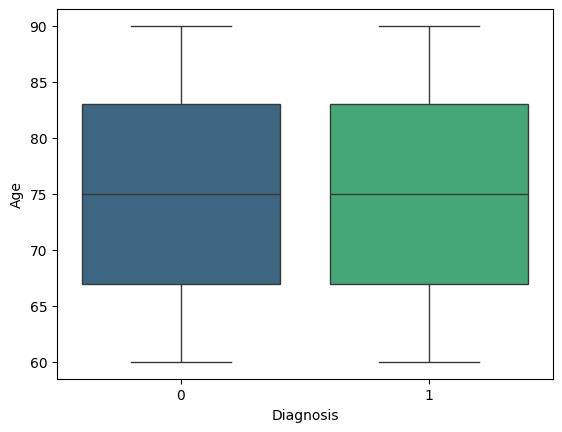

In [79]:
sns.boxplot(x='Diagnosis', y='Age', data=df, palette='viridis')

In [82]:
# Assuming your cleaned dataset is in a pandas DataFrame called `cleaned_data`
df.to_csv('cleaned_dataset.csv', index=False)
from IPython.display import FileLink

# Replace 'cleaned_dataset.csv' with your file name
FileLink('cleaned_dataset.csv')


c:\Level 4 sem1\Data Mining\Project_DataMining\cleaned_dataset.csv

In [83]:
df['Diagnosis'].value_counts()

0    1389
1     760
Name: Diagnosis, dtype: int64